In [137]:
import pandas as pd
import numpy as np
from collections import defaultdict
import datetime
import sys, os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
from tqdm.notebook import tqdm

In [2]:
ls data/

dfSalesAnonimized.pkl


### Plan
1. Find similar pairs of companies in terms of cosine distance between vectors consisting of product quantities with a certain threshold of cosine similarity
2. Find top-N products for a certain period for each of the companies
3. Define diffrences between top-N products for pairs from 1 and use them for forming a list of recommended products for each company for a considerd period (in step 2)

#### Loading previously saved clean raw dataset

In [102]:
dfMain=pd.read_pickle('data/dfSalesAnonimized.pkl')
dfMain.taxNumber = dfMain.taxNumber.apply(lambda x: x.replace('taxNumber_item','company'))
dfMain['quantity'] = [int(100 * random.random()) for i in range(len(dfMain))]

In [103]:
dfMain.sample(10)

,date,product,quantity,sum,company,taxNumber
25422,2018-06-28,product_item_189,42,42165.802994,company_item_8,company_8
24084,2018-10-06,product_item_184,65,15655.619924,company_item_28,company_28
43747,2018-03-21,product_item_365,27,36738.521421,company_item_260,company_259
297311,2021-01-18,product_item_500,87,79843.661610,company_item_6,company_6
141662,2019-01-14,product_item_407,7,89758.887562,company_item_181,company_180
128255,2019-02-07,product_item_285,50,84775.181886,company_item_21,company_21
287579,2021-04-15,product_item_281,86,32026.179824,company_item_646,company_643
8673,2018-03-19,product_item_98,87,23796.542284,company_item_6,company_6
144411,2019-02-18,product_item_420,6,102758.792493,company_item_54,company_54
203930,2020-12-18,product_item_177,7,75146.975633,company_item_51,company_51


In [104]:
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308243 entries, 0 to 308242
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       308243 non-null  datetime64[ns]
 1   product    308243 non-null  object        
 2   quantity   308243 non-null  int64         
 3   sum        308243 non-null  float64       
 4   company    308243 non-null  object        
 5   taxNumber  308243 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 14.1+ MB


In [105]:
df2 = dfMain.copy()
df2['year'] = df2['date'].apply(lambda x: x.year)
df2['month'] = df2['date'].apply(lambda x: x.month)

In [106]:
df2.columns

Index(['date', 'product', 'quantity', 'sum', 'company', 'taxNumber', 'year',
       'month'],
      dtype='object')

In [107]:
def rangeOfAssortment(df, taxNum, period, top = 10):
    df2=df.copy()
    df2=df2[df2.taxNumber == taxNum]
    if period == 'year':
        for y in df2.year.unique():
            dfY=df2[df2.year==y]
            dfYg = dfY.groupby(by='product').sum()
            dfYg = dfYg.sort_values(by='quantity', ascending = False).iloc[:top]
            #sns.barplot(x=dfYg.index, y="quantity", data=dfYg)
            #plt.figure(figsize=[20,10])
            fig = px.bar(x=dfYg.index, y="quantity", data_frame=dfYg, title=str(y))
            fig.show()
    elif period == 'month':
        for y in np.sort(df2.year.unique()):
            dfY=df2[df2.year==y]
            for m in np.sort(df2.month.unique()):
                dfM=dfY[dfY.month==m]
                dfMg = dfM.groupby(by='product').sum()
                dfMg = dfMg.sort_values(by='quantity', ascending = False).iloc[:top]
                #sns.barplot(x=dfYg.index, y="quantity", data=dfYg)
                #plt.figure(figsize=[20,10])    
                fig = px.bar(x=dfMg.index, y="quantity", data_frame=dfMg, title=str(m)+'.'+str(y))
                fig.show()
                input()

In [108]:
def getTopProducts(df, taxNum, month, top = 10):
    df2=df.copy()
    df2=df2[df2.taxNumber == taxNum]
            
    dfM=df2[df2.month==month]
    dfMg = dfM.groupby(by='product').sum()
    dfMg = dfMg.sort_values(by='quantity', ascending = False).iloc[:top]
    #sns.barplot(x=dfYg.index, y="quantity", data=dfYg)
    #plt.figure(figsize=[20,10])    
#     fig = px.bar(x=dfMg.index, y="quantity", data_frame=dfMg, title=str(month))
#     fig.show()
#     input()
    return dfMg['quantity'].index

In [109]:
def getTopProductsTotal(df, taxNum, top = 10):
    df2=df.copy()
    df2=df2[df2.taxNumber == taxNum]
            
    dfMg = df2.groupby(by='product').sum()
    dfMg = dfMg.sort_values(by='quantity', ascending = False).iloc[:top]
    #sns.barplot(x=dfYg.index, y="quantity", data=dfYg)
    #plt.figure(figsize=[20,10])    
#     fig = px.bar(x=dfMg.index, y="quantity", data_frame=dfMg, title=str(month))
#     fig.show()
#     input()
    return dfMg['quantity'].index

In [110]:
df2[df2.year==2020].groupby(by='product').sum()[['quantity']]

,quantity
product,
product_item_1,6138
product_item_10,126
product_item_100,73
product_item_1000,41
product_item_1003,141
...,...
product_item_989,6761
product_item_99,16846
product_item_990,98


In [30]:
df2

,date,product,quantity,sum,company,taxNumber,year,month
0,2018-09-13,product_item_1,88,35750.234320,company_item_1,taxNumber_item_1,2018,9
1,2018-10-11,product_item_1,94,35912.426543,company_item_1,taxNumber_item_1,2018,10
2,2018-07-14,product_item_1,83,82452.931598,company_item_1,taxNumber_item_1,2018,7
3,2018-08-14,product_item_1,8,82452.931598,company_item_1,taxNumber_item_1,2018,8
4,2018-09-27,product_item_1,10,82452.931598,company_item_1,taxNumber_item_1,2018,9
...,...,...,...,...,...,...,...,...
308238,2021-04-28,product_item_1280,64,511449.585564,company_item_274,taxNumber_item_273,2021,4
308239,2021-04-29,product_item_1280,56,604440.419303,company_item_274,taxNumber_item_273,2021,4
308240,2021-04-30,product_item_1280,10,46495.416869,company_item_274,taxNumber_item_273,2021,4
308241,2021-02-02,product_item_1280,31,-200407.590642,company_item_898,taxNumber_item_894,2021,2


In [111]:
df3 = dfMain.groupby(by=['taxNumber','product']).sum()['quantity'].unstack()
# df3.index = [f'company_{i}' for i in range(len(df3))]

In [112]:
df3

product,product_item_1,product_item_10,product_item_100,product_item_1000,product_item_1001,product_item_1002,product_item_1003,product_item_1004,product_item_1005,product_item_1006,...,product_item_990,product_item_991,product_item_992,product_item_993,product_item_994,product_item_995,product_item_996,product_item_997,product_item_998,product_item_999
taxNumber,,,,,,,,,,,,,,,,,,,,,
company_1,273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_10,2674.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_100,NaN,NaN,51.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
company_95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
company_97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
df3 = df3.fillna(0)

In [114]:
from sklearn.metrics.pairwise import cosine_similarity

In [115]:
df4 = pd.DataFrame(cosine_similarity(df3,df3), index=df3.index, columns = df3.index)
df4

taxNumber,company_1,company_10,company_100,company_101,company_102,company_103,company_104,company_105,company_106,company_107,...,company_915,company_916,company_92,company_93,company_94,company_95,company_96,company_97,company_98,company_99
taxNumber,,,,,,,,,,,,,,,,,,,,,
company_1,1.000000,0.808943,0.688960,0.197747,0.570116,0.353189,0.296743,0.245752,0.621458,0.784425,...,0.049880,0.021892,0.038102,0.833108,0.340095,0.464564,0.480687,0.365646,0.713510,0.329900
company_10,0.808943,1.000000,0.775852,0.181999,0.561598,0.256723,0.314303,0.296691,0.637173,0.724790,...,0.044336,0.000000,0.110279,0.885871,0.350826,0.581988,0.568251,0.385245,0.765176,0.448472
company_100,0.688960,0.775852,1.000000,0.079160,0.523335,0.189893,0.283999,0.178863,0.636804,0.632902,...,0.018168,0.009429,0.029346,0.730940,0.329591,0.579876,0.456407,0.338489,0.718839,0.422261
company_101,0.197747,0.181999,0.079160,1.000000,0.043905,0.179978,0.045574,0.130266,0.167140,0.253205,...,0.000000,0.000000,0.000000,0.222917,0.000000,0.035086,0.196512,0.125901,0.183081,0.000000
company_102,0.570116,0.561598,0.523335,0.043905,1.000000,0.172732,0.242404,0.123628,0.354435,0.394767,...,0.000000,0.000000,0.002373,0.530256,0.267994,0.470761,0.205125,0.327953,0.410615,0.346761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
company_95,0.464564,0.581988,0.579876,0.035086,0.470761,0.044691,0.120898,0.142402,0.380840,0.274941,...,0.000000,0.000000,0.038966,0.519963,0.392305,1.000000,0.464021,0.296022,0.603410,0.550364
company_96,0.480687,0.568251,0.456407,0.196512,0.205125,0.169110,0.125427,0.197737,0.264637,0.373713,...,0.000000,0.000000,0.000492,0.550135,0.166263,0.464021,1.000000,0.341182,0.548520,0.399025
company_97,0.365646,0.385245,0.338489,0.125901,0.327953,0.035241,0.201633,0.155415,0.172784,0.240729,...,0.000000,0.000000,0.003189,0.392361,0.245765,0.296022,0.341182,1.000000,0.299663,0.251526


<AxesSubplot:title={'center':'Cosine similarities'}>

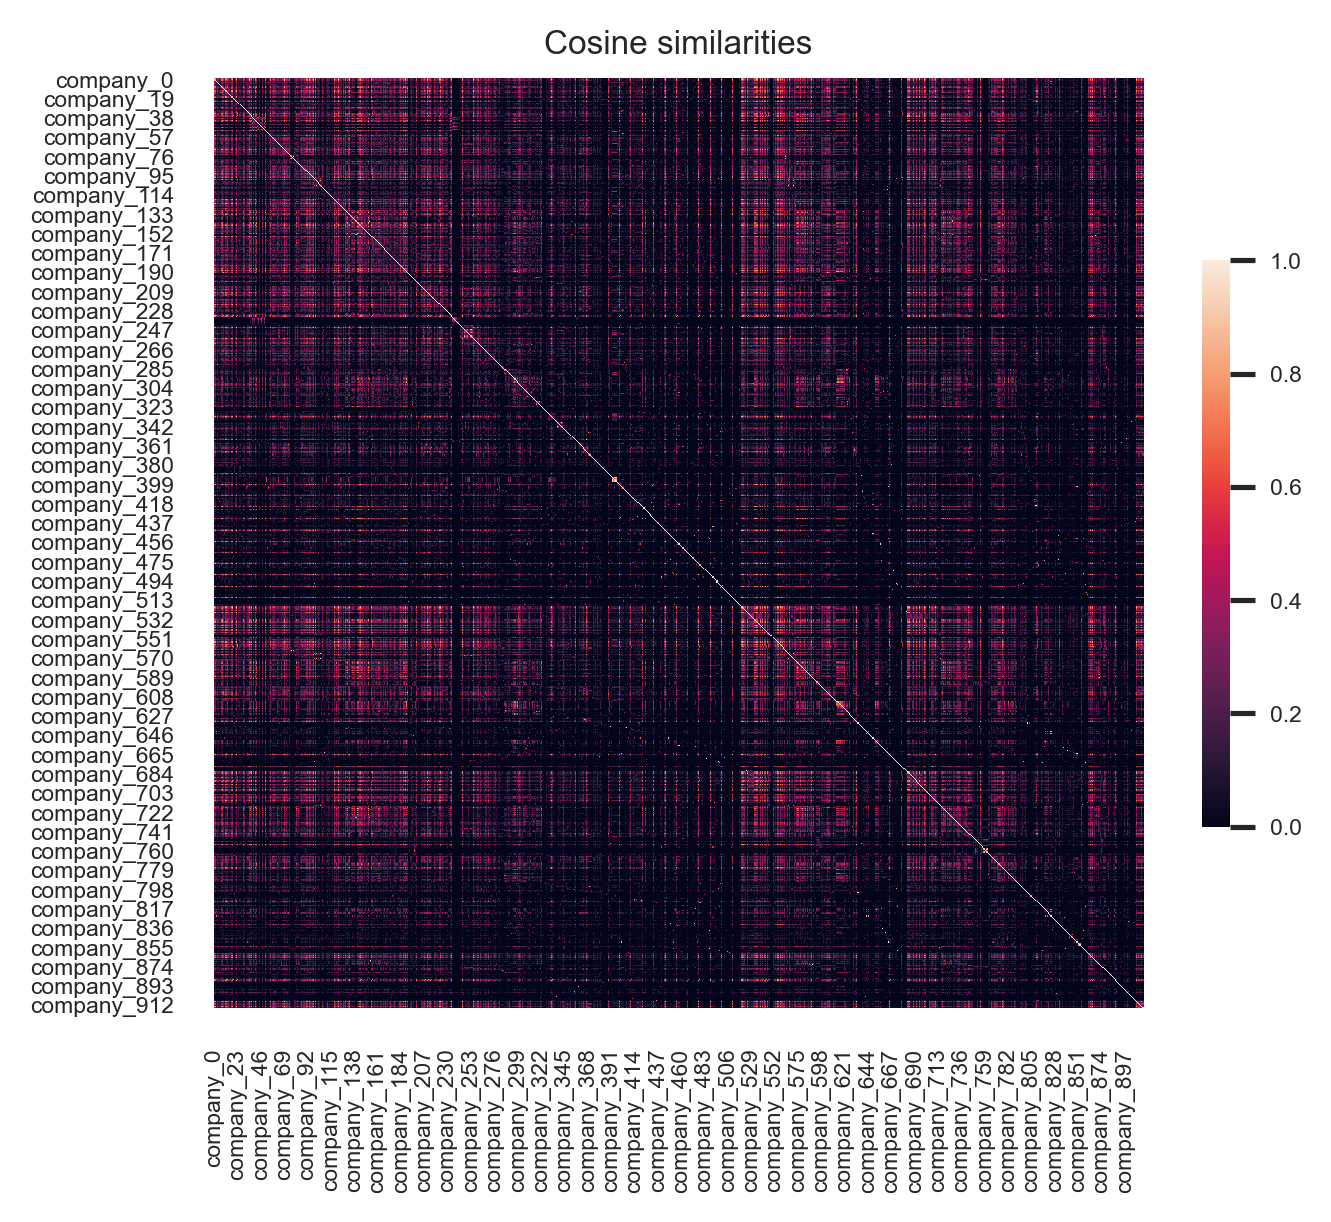

In [64]:
plt.figure(figsize=(5, 5), dpi=300)
sns.set(font_scale=0.5)
plt.title("Cosine similarities", fontsize =8)
# plt.rc('xtick', labelsize=5) 
# plt.rc('ytick', labelsize=5) 
sns.heatmap(df4, square=True, cbar_kws={"shrink": 0.5})


In [117]:
simPairs = df4.unstack().sort_values(kind="quicksort")
simPairs75 = simPairs[simPairs>0.8]
dctPairs = defaultdict(list)
#for i, v in zip(simPairs[simPairs>0.5].index,simPairs):
for tN in dfMain.taxNumber.unique():
    dctPairs[tN] = simPairs75[simPairs75.index.get_level_values(0) == tN].index.get_level_values(1)

In [118]:
dctPairs

defaultdict(list,
            {'company_1': Index(['company_116', 'company_59', 'company_716', 'company_10', 'company_61',
                    'company_30', 'company_46', 'company_32', 'company_162', 'company_67',
                    'company_53', 'company_73', 'company_12', 'company_33', 'company_93',
                    'company_63', 'company_581', 'company_573', 'company_23', 'company_54',
                    'company_569', 'company_6', 'company_50', 'company_27', 'company_21',
                    'company_29', 'company_1'],
                   dtype='object', name='taxNumber'),
             'company_2': Index(['company_2'], dtype='object', name='taxNumber'),
             'company_3': Index(['company_3'], dtype='object', name='taxNumber'),
             'company_4': Index(['company_24', 'company_10', 'company_110', 'company_21', 'company_88',
                    'company_54', 'company_22', 'company_77', 'company_601', 'company_8',
                    'company_23', 'company_9', 'compan

In [119]:
dctTop = defaultdict(list)
for tN in dfMain.taxNumber.unique(): 
    dctTop[tN]=getTopProductsTotal(df2, tN)

In [120]:
dctRec = defaultdict(list)
for p in dctPairs:
    lst = []
    for t in dctPairs[p]:
        lst+=list(dctTop[t])
    s = set(lst)
    dctRec[p]=list(s.difference(set(dctTop[p])))

In [121]:
from IPython.display import clear_output

In [89]:

dfMain.taxNumber

0           company_1
1           company_1
2           company_1
3           company_1
4           company_1
             ...     
308238    company_273
308239    company_273
308240    company_273
308241    company_894
308242    company_846
Name: taxNumber, Length: 308243, dtype: object

In [96]:
dfMain[dfMain.taxNumber == 'company_0'].taxNumber.unique()

array([], dtype=object)

In [146]:
dctSimCompanies = {'company':[], 
                   'similar':[], 
                   'recommendations':[]}
for k in tqdm(dctPairs):
    dctSimCompanies['company'].append(dfMain[dfMain.taxNumber == k].company.unique()[0])
    lst = []
    for i,p in enumerate(dctPairs[k]):
        name = dfMain[dfMain.taxNumber == p].company.unique()[0] 
        name = name.replace(','," ")
        lst.append(name)
        #print(i,'.\t',dfMain[dfMain.taxNumber == p].company.unique()[0])
    dctSimCompanies['similar'].append(lst)
dctSimCompanies['recommendations'] = [dctRec[k] for k in dctRec]

In [147]:
dfSimCompanies = pd.DataFrame(dctSimCompanies) 
dfSimCompanies

,company,similar,recommendations
0,company_item_1,"[company_item_116, company_item_59, company_it...","[product_item_218, product_item_414, product_i..."
1,company_item_2,[company_item_2],[]
2,company_item_3,[company_item_3],[]
3,company_item_4,"[company_item_24, company_item_10, company_ite...","[product_item_184, product_item_218, product_i..."
4,company_item_5,[company_item_5],[]
...,...,...,...
911,company_item_918,[company_item_918],[]
912,company_item_919,"[company_item_681, company_item_919]",[product_item_246]
913,company_item_920,[company_item_920],[]
914,company_item_921,[company_item_921],[]


Checking with stakeholders:  
Should we check if companies are similar in terms of total sales or half a year or last month, etc?  

From statistical point of view we could approach this question by defining the mean period which leads to significant difference in companies purchases. Say we set a threshold of 20%: 
1. We get a compnay's product set for the 3rd/6th month (to avoid possible significant differences during the initial period when product range is unstable)
2. Than with a time step of 1 month we check if If the company's top-N product range differs by 20%
3. Then we can define the mean period for all companies

In [149]:
dfSimCompanies.to_excel('salesRecommendations.xlsx')